# Individual household electric power consumption


The dataset is available on: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

First, we import the libraries that we are going to use 

In [86]:
 import os

In [87]:
 import pandas as pd  

In [88]:
from numpy import nan
from pandas import read_csv

In [90]:
# upload data
df = read_csv('/Users/jaleguro/Documents/Python/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [91]:
print(dataset.shape)
print(dataset.head())

(2075259, 8)
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [92]:
# Lost Values
df.replace('?', nan, inplace=True)

In [93]:
# add a column nuevas mediciones
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [94]:
# Save DF
df.to_csv('household_power_consumption.csv')
# Load DF
df = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(dataset.head())

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [95]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtype: object

In [96]:
%matplotlib notebook

A time series is used to analyze the data so a line diagram is created for each variable

<IPython.core.display.Javascript object>


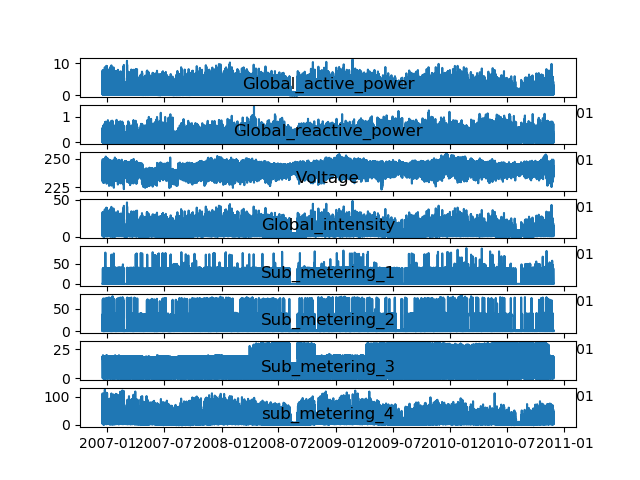

In [97]:
# line plots
from matplotlib import pyplot
pyplot.figure()
for i in range(len(df.columns)):
	pyplot.subplot(len(df.columns), 1, i+1)
	name = df.columns[i]
	pyplot.plot(df[name])
	pyplot.title(name, y=0)
pyplot.show()

In each graph by variable we can observe the behavior of the 4 years per minute highlighting the following variables in their behavior

* Sub_metering_3 '(environmental control) presents a difference in behavior compared to the other variables in certain periods or months, which may be the time of greater or lesser consumption depending on the month of the year

* sub_metering_4 shows a downward trend

<IPython.core.display.Javascript object>


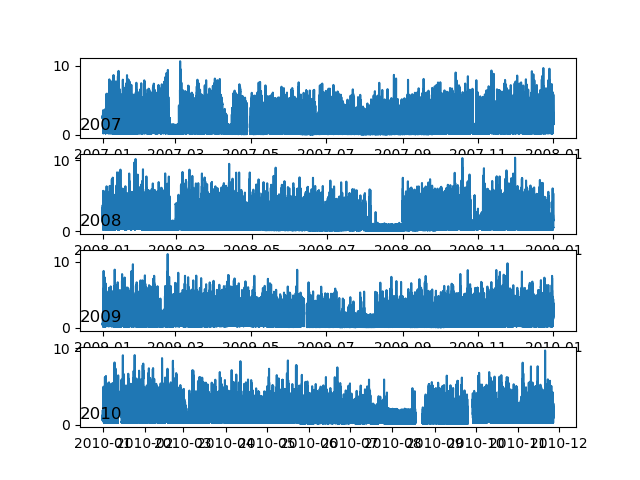

In [98]:
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
	ax = pyplot.subplot(len(years), 1, i+1)
	year = years[i]
	result = df[str(year)]
	pyplot.plot(result['Global_active_power'])
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()